##Import Necessary Libraries

In [0]:
#Importing Necessary Libraries on the go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows',2000)

## Read Train and Test Datasets

In [0]:
#Read Dataset onto Dataframe
train_data_path = '/content/train.csv'
test_data_path = '/content/test.csv'
sample_submission_data_path =  '/content/sample_submission.csv'

data = pd.read_csv(train_data_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test_data = pd.read_csv(test_data_path)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


##Basic Information in Dataset

In [0]:
data.shape

(1460, 81)

In [0]:

test_data.shape

(1459, 80)

In [0]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [0]:
test_data.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [0]:
# #Have Seperate Numerical and Categorical Data
# num_data = data.select_dtypes(include=['int64','float64'])
# cat_data = data.select_dtypes(include=['object'])

In [0]:
def get_dist_plot(dataset,target_col,bins_val):
  plt.hist(dataset[target_col],bins=bins_val)
  plt.title("Distribution plot")
  plt.xlabel(target_col + "Variable");
  plt.ylabel("Count");

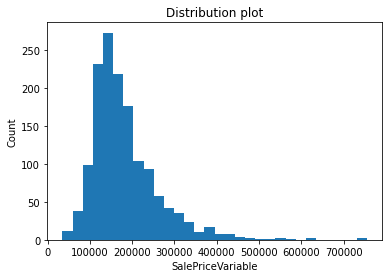

In [0]:
#checking function
get_dist_plot(data,'SalePrice',30)

#Target variable is skewed left, hence must use log transformation at the end

In [0]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



##Plotting Heatmap to find our correlation between different variables


###Correlation Matrix and heatmap

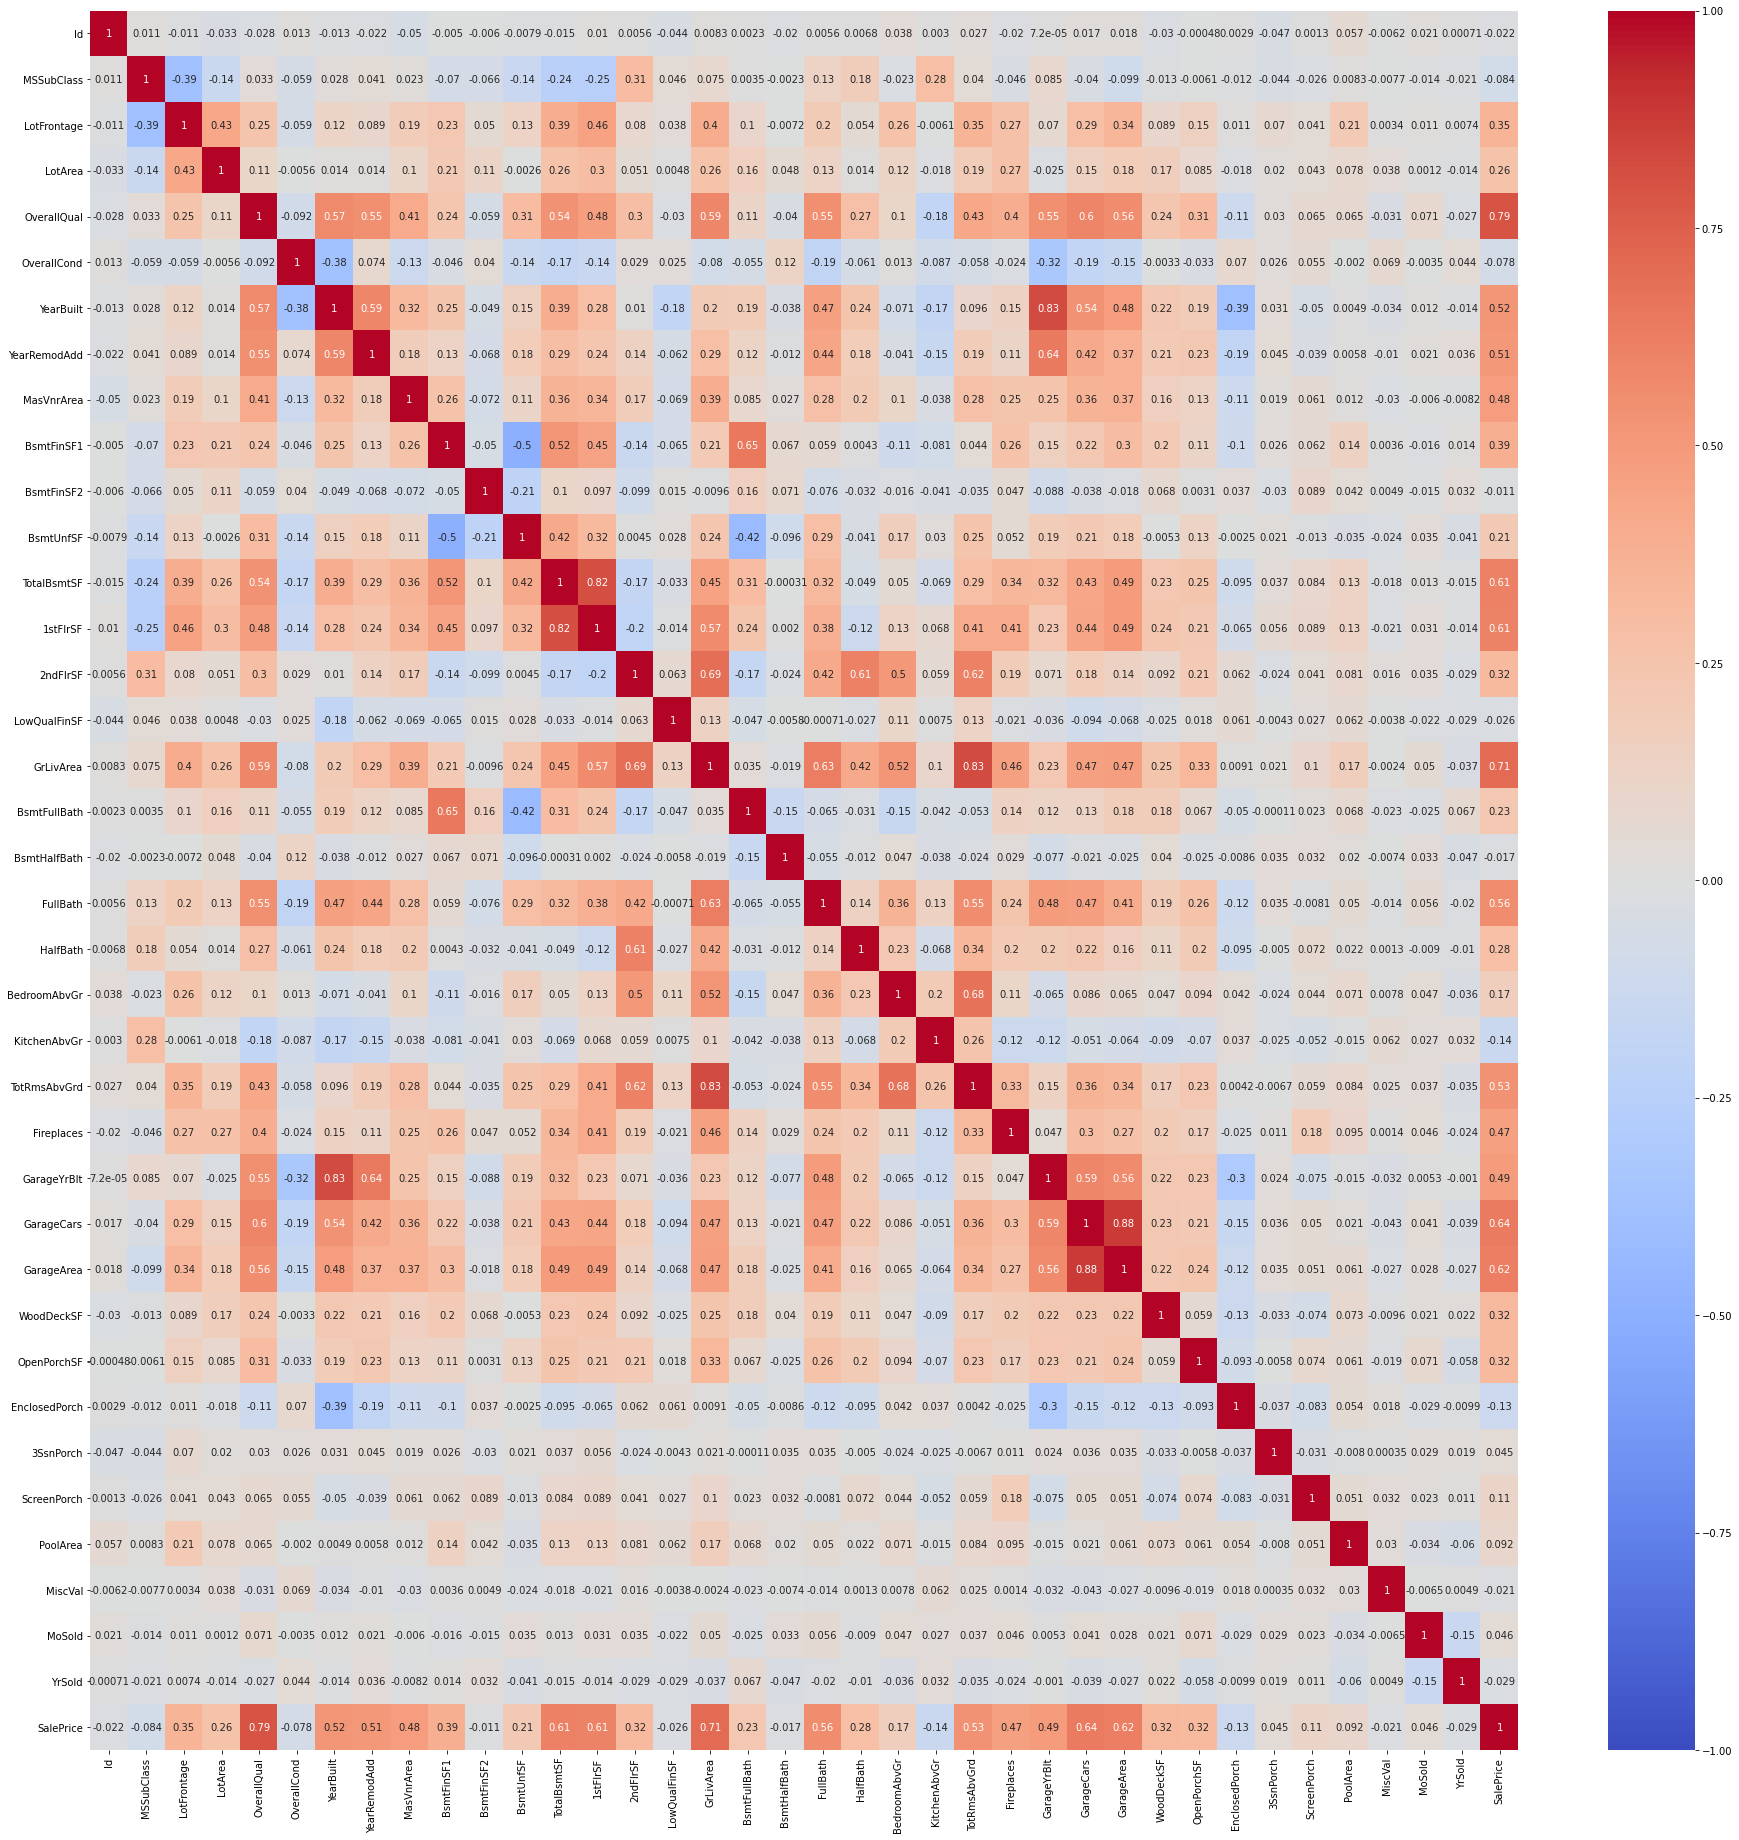

In [0]:
plt.figure(figsize=(32,32))
data_corr = data.corr()
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

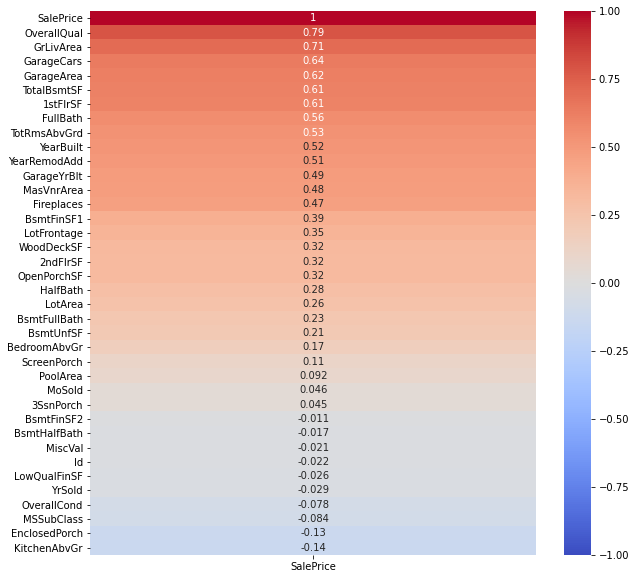

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

###Dealing with NAN in train

In [0]:
col_drop_list = data.isnull().sum()[data.isnull().sum() > 600].index

In [0]:
col_drop_list

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [0]:
data.shape

(1460, 81)

In [0]:
#Dropping columns with several missing values
col_drop_data = data.drop(columns=col_drop_list,axis=1)

In [0]:
col_drop_data = col_drop_data.drop(columns='Id',axis=1)

In [0]:
col_drop_data.shape

(1460, 75)

In [0]:
# Lot frontge = Linear feet of street connected to property so Nan values kind of infer that there is no Lot Frontage area
#Other Missing values are contribute to less than 5 % of total value hence removed

col_drop_data.isnull().sum()[col_drop_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [0]:
col_drop_data['LotFrontage'].fillna(col_drop_data['LotFrontage'].min(),inplace=True)

In [0]:
#Have to Deal with Basement Columns and Garage Columns first create a copy
col_drop_data_2 = col_drop_data.copy()

In [0]:
#Replacing Nan with Unk meaning Unknown
col_drop_data_2['BsmtQual'] = col_drop_data_2['BsmtQual'].replace(np.nan,'Unk')
col_drop_data_2['BsmtCond'] = col_drop_data_2['BsmtCond'].replace(np.nan,'Unk')
col_drop_data_2['BsmtExposure'] = col_drop_data_2['BsmtExposure'].replace(np.nan,'Unk')
col_drop_data_2['BsmtFinType1'] = col_drop_data_2['BsmtFinType1'].replace(np.nan,'Unk')
col_drop_data_2['BsmtFinType2'] = col_drop_data_2['BsmtFinType2'].replace(np.nan,'Unk')
col_drop_data_2['GarageType'] = col_drop_data_2['GarageType'].replace(np.nan,'Unk')
col_drop_data_2['GarageFinish'] = col_drop_data_2['GarageFinish'].replace(np.nan,'Unk')
col_drop_data_2['GarageQual'] = col_drop_data_2['GarageQual'].replace(np.nan,'Unk')
col_drop_data_2['GarageCond'] = col_drop_data_2['GarageCond'].replace(np.nan,'Unk')
col_drop_data_2['GarageYrBlt'].fillna(col_drop_data_2['GarageYrBlt'].mean(),inplace=True)


In [0]:
col_drop_data_2.isnull().sum()[col_drop_data_2.isnull().sum()>0]

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

In [0]:
# col_drop_data_2['MasVnrType'].fillna(col_drop_data_2['MasVnrType'].mode()[0],inplace=True)
# col_drop_data_2['MasVnrArea'].fillna(col_drop_data_2['MasVnrArea'].mode()[0],inplace=True)
# col_drop_data_2['Electrical'].fillna(col_drop_data_2['Electrical'].mode()[0],inplace=True)
col_drop_data_2.dropna(inplace=True)

In [0]:
# 8 + 1 rows are droppped
col_drop_data_2.shape

(1451, 75)

In [0]:
train_data = col_drop_data_2.copy()

###Dealing with NAN in Test

In [0]:
col_drop_list = test_data.isnull().sum()[test_data.isnull().sum() > 600].index

In [0]:
test_data = test_data.drop(columns=col_drop_list,axis=1)

In [0]:
Id_data = test_data['Id']

In [0]:
test_data = test_data.drop(columns='Id',axis=1)

In [0]:
test_data.isnull().sum()[test_data.isnull().sum()>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [0]:
test_data['LotFrontage'].fillna(test_data['LotFrontage'].min(),inplace=True)

In [0]:

test_data['BsmtQual'] = test_data['BsmtQual'].replace(np.nan,'Unk')
test_data['BsmtCond'] = test_data['BsmtCond'].replace(np.nan,'Unk')
test_data['BsmtExposure'] = test_data['BsmtExposure'].replace(np.nan,'Unk')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].replace(np.nan,'Unk')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].replace(np.nan,'Unk')
test_data['GarageType'] = test_data['GarageType'].replace(np.nan,'Unk')
test_data['GarageFinish'] = test_data['GarageFinish'].replace(np.nan,'Unk')
test_data['GarageQual'] = test_data['GarageQual'].replace(np.nan,'Unk')
test_data['GarageCond'] = test_data['GarageCond'].replace(np.nan,'Unk')
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean(),inplace=True)

In [0]:
missing_val_cols =  test_data.isnull().sum()[test_data.isnull().sum()>0].index

In [0]:
for col in missing_val_cols:
  test_data[col].fillna(test_data[col].mode()[0],inplace=True)

In [0]:
#74 Columns only cause It doesnt have SalePrice
test_data.shape

(1459, 74)

In [0]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


## Feature Engineering

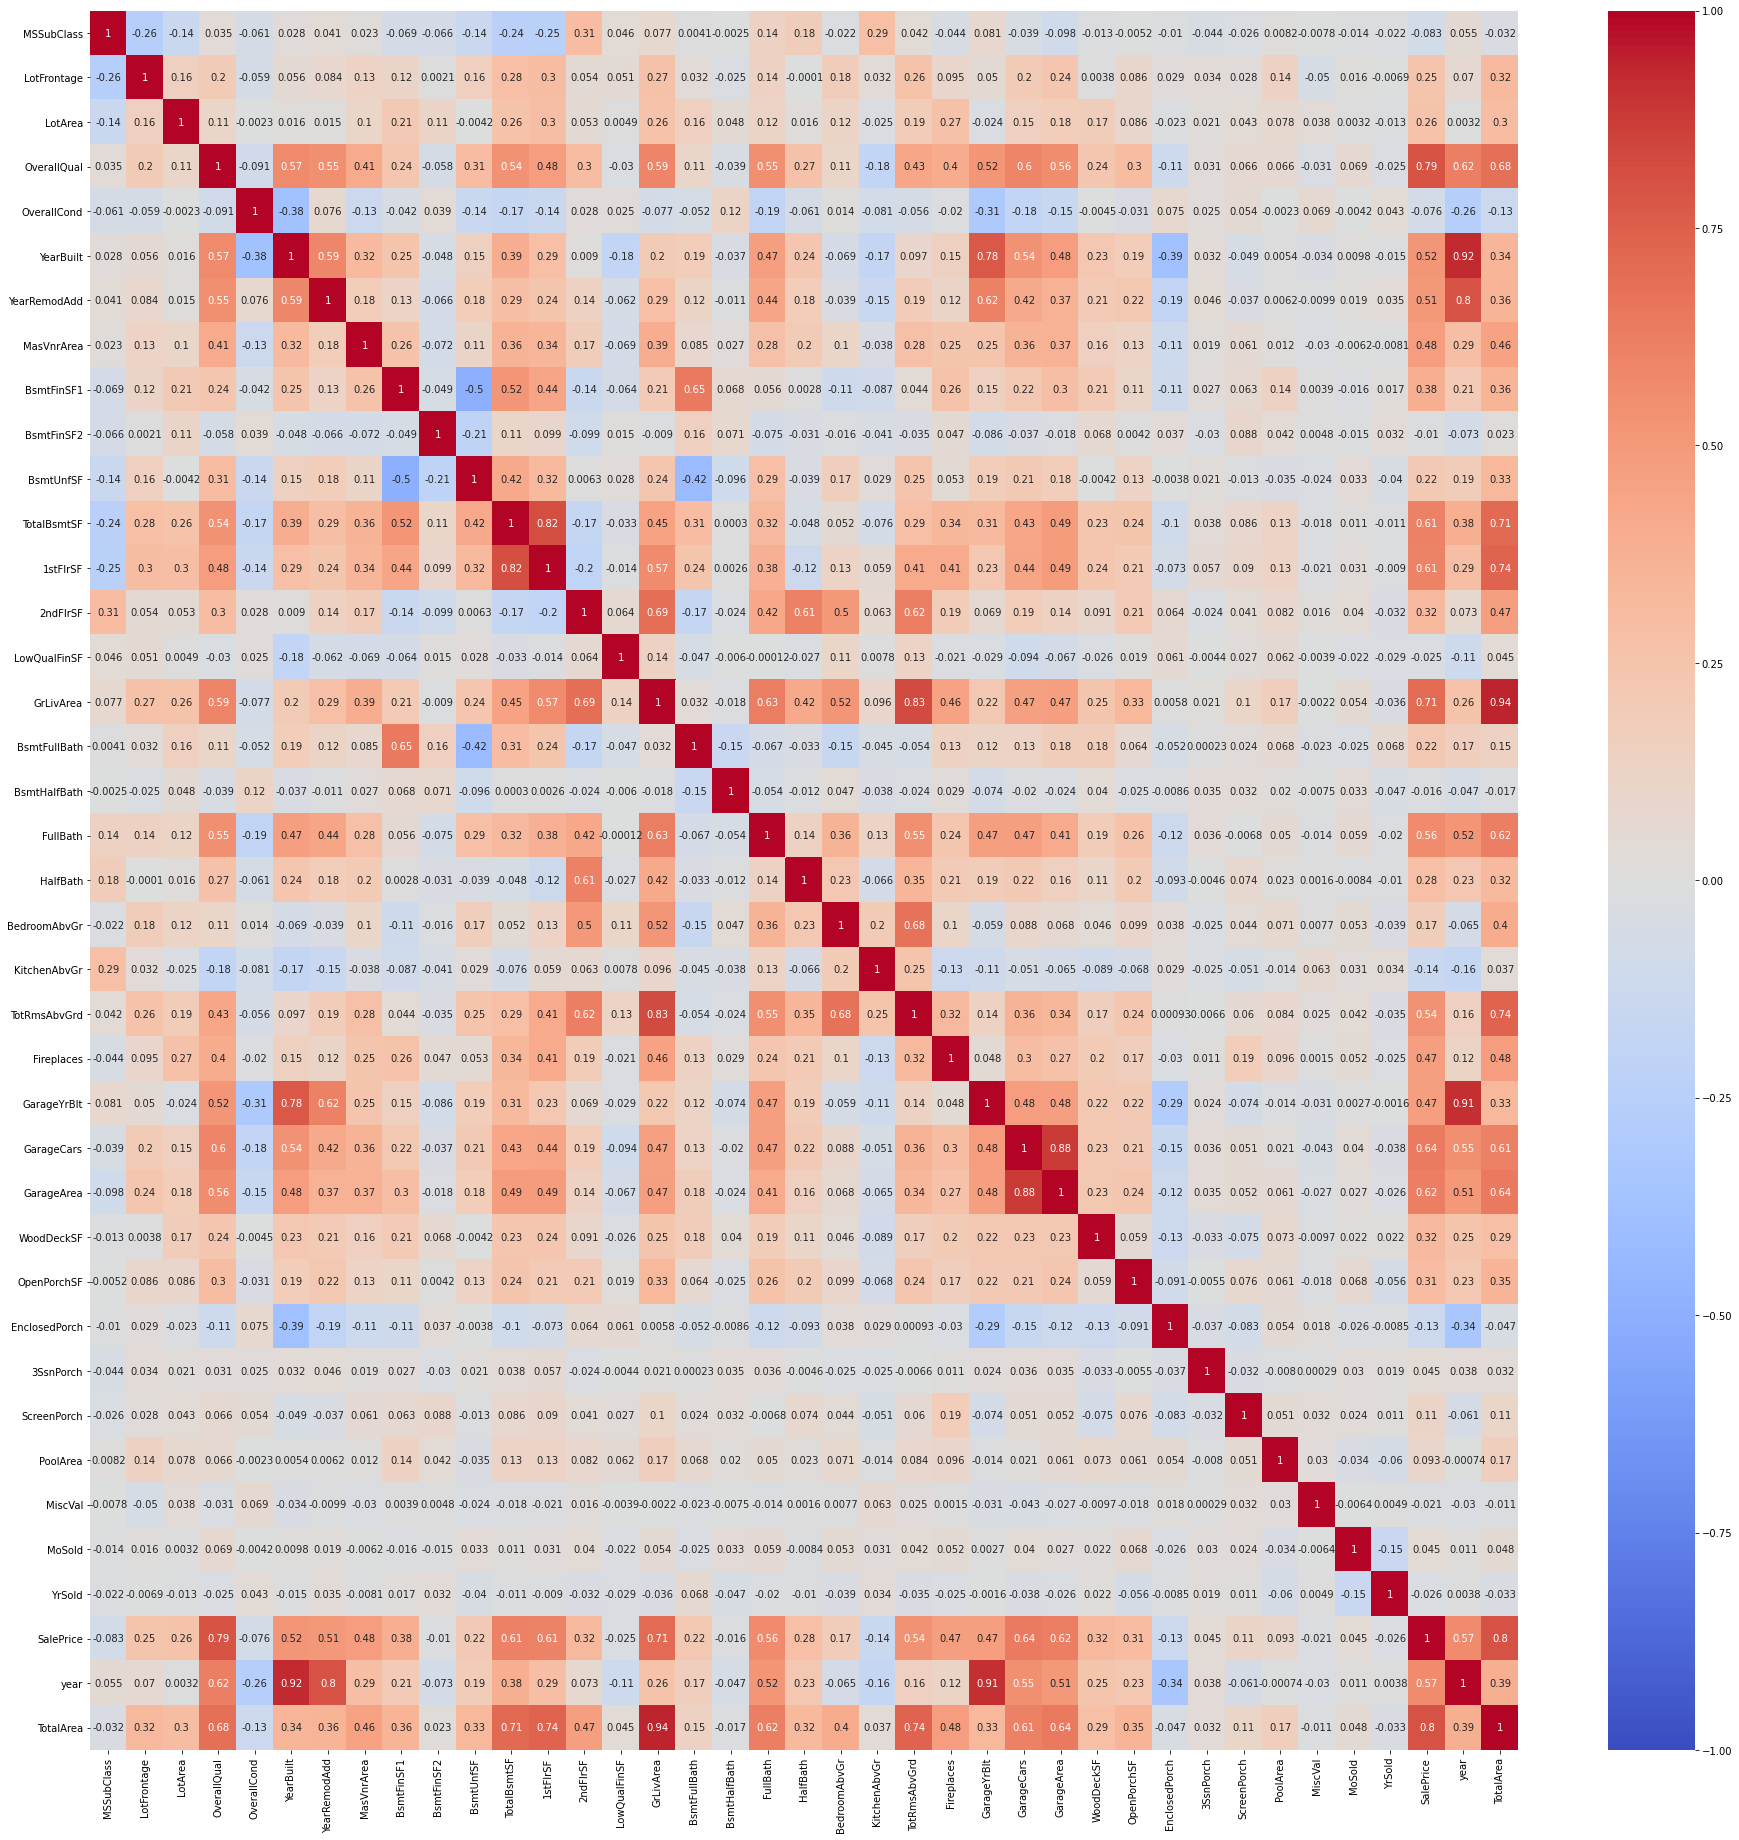

In [0]:
#Some Feature Selection on Train
test_data['year'] = (test_data['YearBuilt'] + test_data['YearRemodAdd'] + test_data['GarageYrBlt'])/3
test_data['TotalArea'] = test_data['TotalBsmtSF']+test_data['1stFlrSF']+test_data['2ndFlrSF']+test_data['GrLivArea']+test_data['GarageArea']


#Some Feature Selection on Test
train_data['year'] = (train_data['YearBuilt'] + train_data['YearRemodAdd'] + train_data['GarageYrBlt'])/3
train_data['TotalArea'] = train_data['TotalBsmtSF']+train_data['1stFlrSF']+train_data['2ndFlrSF']+train_data['GrLivArea']+train_data['GarageArea']


plt.figure(figsize=(32,32))
train_data_corr = train_data.corr()
sns.heatmap(train_data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

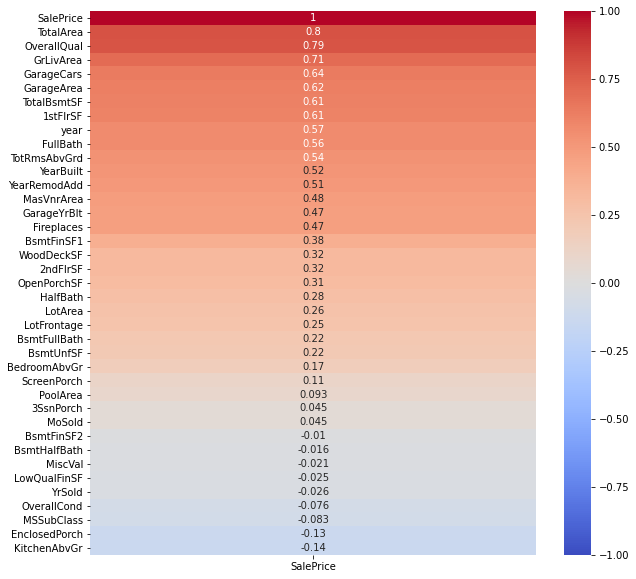

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

###Joining Train and Test for Pre-Processing

In [0]:
#Shape After Adding three columns
train_data.shape

(1451, 77)

In [0]:
train_data.dtypes.value_counts()

object     38
int64      35
float64     4
dtype: int64

In [0]:
test_data.shape

(1459, 76)

In [0]:
test_data.dtypes.value_counts()

object     38
int64      25
float64    13
dtype: int64

In [0]:
# train_data = train_data.iloc[:,0:74]
train_W_data = train_data.iloc[:,0:74]
target_data = train_data['SalePrice']
target_data.shape

(1451,)

In [0]:
total_data = pd.concat([train_W_data,test_data])

In [0]:
total_data.shape

(2910, 76)

In [0]:
total_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,year,TotalArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,NaN,NaN
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,NaN,NaN
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,NaN,NaN
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,NaN,NaN
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,NaN,NaN


#Handling Outliers in Train

In [0]:
#Removing Outliers Where Z score is Greater than 3

#Have Seperate Numerical and Categorical Data
num_data = train_data.select_dtypes(include=['int64','float64'])
cat_data = train_data.select_dtypes(include=['object'])

num_data.describe()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,year,TotalArea
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,61.343901,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.361819,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999,1978.071445,4551.303239
std,42.350366,28.920240,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.986416,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273,22.080157,1433.735368
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1920.000000,668.000000
25%,20.000000,42.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000,1961.333333,3549.000000
50%,50.000000,63.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000,1977.000000,4382.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,2000.000000,5320.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,2010.000000,18812.000000


In [0]:
def scatter_plot(dataset,target_col):
  sorted(target_col)
  Q1,Q3 = np.percentile(dataset[target_col], [25,75])
  IQR = Q3 - Q1
  upper_range = (Q3 + (1.5 * IQR))
  plt.scatter(x=dataset[target_col],y=dataset['SalePrice'],alpha=0.5);
  plt.axvline(x=upper_range,color='r',linestyle='-')
  plt.title("Scatter for Outlier" + str(target_col))
  plt.show()

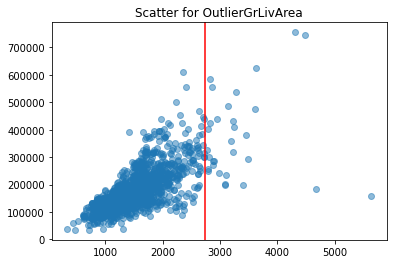

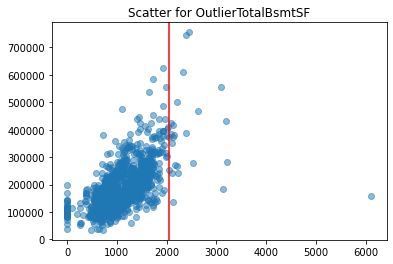

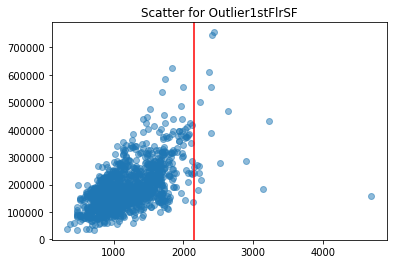

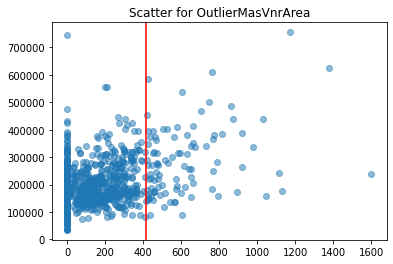

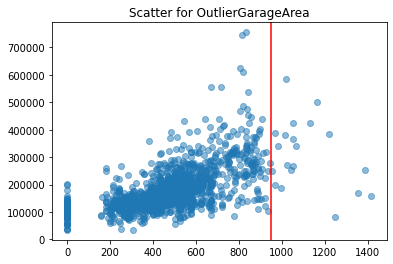

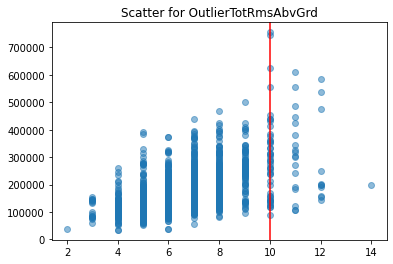

In [0]:
# num_data_corr = num_data.corr()

# sale_corr_data = num_data_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False)
# sale_corr_list = sale_corr_data[sale_corr_data > 0.5].dropna().index

# for i in sale_corr_list:
#   scatter_plot(num_data,i)
scatter_plot(num_data,'GrLivArea')
scatter_plot(num_data,'TotalBsmtSF')
scatter_plot(num_data,'1stFlrSF')
scatter_plot(num_data,'MasVnrArea')
scatter_plot(num_data,'GarageArea')
scatter_plot(num_data,'TotRmsAbvGrd')


In [0]:
#Note down columns
num_data['MasVnrArea'].sort_values(ascending=False).head(2)

297     1600.0
1169    1378.0
Name: MasVnrArea, dtype: float64

In [0]:
num_data.shape

(1451, 39)

In [0]:
#Dropping Outlier and removing them in train data
pos = [1298,523,297]
train_data.drop(train_data.index[pos],inplace=True)
train_data.shape


(1448, 77)

###Getting to know the catergorical variables

In [0]:
# train_data has SalesPrice and train_W_data doesnt ... use Accordingly
#All missing Values have been handled in Training Dataset
train_W_data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

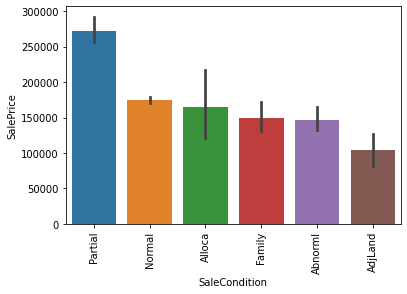

In [0]:
sns.barplot(data=train_data,x='SaleCondition',y='SalePrice',order = data.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90);

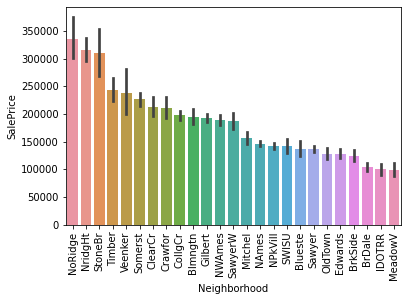

In [0]:
sns.barplot(data=train_data,x='Neighborhood',y='SalePrice',order = data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90);

#More popular neighborhoods have higher house plots rates

In [0]:
#Categoricals columns that are ordinal
low_ordinal_cols = ['LotShape','Utilities','LandSlope','Neighborhood','Condition1','Condition2','HouseStyle','RoofStyle','RoofMatl',
                    'Exterior1st','Exterior2nd','ExterQual','ExterCond','HeatingQC','CentralAir','BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','SaleType','Heating','Electrical']

In [0]:
#Catergorical columns that are not ordinal
non_ordinal_cols = ['MSZoning','Street','LandContour','LotConfig','BldgType','MasVnrType','Foundation','GarageType','PavedDrive','SaleCondition']

###Dealing with Categorical Data in Train


In [0]:
def get_replace_map(dataset,total_data,low_ordinal_cols):
  replace_map = {}

  for target_col in low_ordinal_cols:
    # print(target_col)
    labels = dataset.groupby(target_col)['SalePrice'].mean().sort_values(ascending=True).index
    key_value_dict = {k: v for k,v in zip(labels,list(range(0,len(labels))))}
  
    if (len(key_value_dict)==len(total_data[target_col].value_counts())):
      replace_map[target_col] = key_value_dict
      # print(replace_map)
    else:
      continue

  return replace_map

In [0]:
#Testing 
labels = train_data.groupby('RoofMatl')['SalePrice'].mean().sort_values(ascending=True).index
key_value_dict = {k: v for k,v in zip(labels,list(range(0,len(labels))))}
print(len(key_value_dict))
print(len(total_data['RoofMatl'].value_counts()))


8
8


In [0]:
#Creating encoding dictionary
replace_map = get_replace_map(train_data,total_data,low_ordinal_cols)

In [0]:
#Encoding ordinal columns in train
train_data.replace(replace_map,inplace=True)

In [0]:
# for col in low_ordinal_cols:
#   train_data[col] = train_data[col].astype('object')


In [0]:
#Just Checking You know
train_data.dtypes.value_counts()

int64      63
object     10
float64     4
dtype: int64

In [0]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year,TotalArea
0,60,RL,65.0,8450,Pave,0,Lvl,1,Inside,0,16,3,4,1Fam,6,7,5,2003,2003,1,2,11,12,BrkFace,196.0,2,3,PConc,3,3,1,6,706,5,0,150,856,5,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,Attchd,2003.0,2,2,548,3,5,Y,0,61,0,0,0,0,0,2,2008,4,Normal,208500,2003.000000,4824
1,20,RL,80.0,9600,Pave,0,Lvl,1,FR2,0,20,2,4,1Fam,5,6,8,1976,1976,1,2,4,6,None,0.0,1,3,CBlock,3,3,4,4,978,5,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,Attchd,1976.0,2,2,460,3,5,Y,298,0,0,0,0,0,0,5,2007,4,Normal,181500,1976.000000,4246
2,60,RL,68.0,11250,Pave,1,Lvl,1,Inside,0,16,3,4,1Fam,6,7,5,2001,2002,1,2,11,12,BrkFace,162.0,2,3,PConc,3,3,2,6,486,5,0,434,920,5,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,Attchd,2001.0,2,2,608,3,5,Y,0,42,0,0,0,0,0,9,2008,4,Normal,223500,2001.333333,5100
3,70,RL,60.0,9550,Pave,1,Lvl,1,Corner,0,17,3,4,1Fam,6,7,5,1915,1970,1,2,5,8,None,0.0,1,3,BrkTil,2,4,1,4,216,5,0,540,756,5,3,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Detchd,1998.0,1,3,642,3,5,Y,0,35,272,0,0,0,0,2,2006,4,Abnorml,140000,1961.000000,4832
4,60,RL,84.0,14260,Pave,1,Lvl,1,FR2,0,24,3,4,1Fam,6,8,5,2000,2000,1,2,11,12,BrkFace,350.0,2,3,PConc,3,3,3,6,655,5,0,490,1145,5,4,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,Attchd,2000.0,2,3,836,3,5,Y,192,84,0,0,0,0,0,12,2008,4,Normal,250000,2000.000000,6377


In [0]:
#One Hot encoding the remaining
train_data_onehot = train_data.copy()

In [0]:
train_data_onehot = pd.get_dummies(train_data_onehot,columns = non_ordinal_cols ,prefix=non_ordinal_cols)

In [0]:
train_data_onehot.shape

(1448, 114)

In [0]:
train_data_onehot.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unk,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,1,0,16,3,4,6,7,5,2003,2003,1,2,11,12,196.0,2,3,3,3,1,6,706,5,0,150,856,5,4,1,4,856,854,0,1710,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,0,1,0,20,2,4,5,6,8,1976,1976,1,2,4,6,0.0,1,3,3,3,4,4,978,5,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,1,1,0,16,3,4,6,7,5,2001,2002,1,2,11,12,162.0,2,3,3,3,2,6,486,5,0,434,920,5,4,1,4,920,866,0,1786,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,1,1,0,17,3,4,6,7,5,1915,1970,1,2,5,8,0.0,1,3,2,4,1,4,216,5,0,540,756,5,3,1,4,961,756,0,1717,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,1,1,0,24,3,4,6,8,5,2000,2000,1,2,11,12,350.0,2,3,3,3,3,6,655,5,0,490,1145,5,4,1,4,1145,1053,0,2198,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
# for col in train_data_onehot.columns:
#   if train_data_onehot[col].dtype == 'uint8':
#     train_data_onehot[col] = train_data_onehot[col].astype('object')

In [0]:
train_data_onehot.dtypes.value_counts()

int64      63
uint8      47
float64     4
dtype: int64

In [0]:
#Drop Duplicates

train_data_onehot = train_data_onehot.loc[:,~train_data_onehot.columns.duplicated()]

In [0]:
train_data_onehot.shape

(1448, 114)

### Dealing with Categorical data in Test

In [0]:
#Encoding ordinal columns in test
test_data.replace(replace_map,inplace=True)

In [0]:
test_data.shape

(1459, 76)

In [0]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,year,TotalArea
0,20,RH,80.0,11622,Pave,0,Lvl,1,Inside,0,10,2,4,1Fam,5,5,6,1961,1961,1,2,11,12,None,0.0,1,3,CBlock,2,3,1,1,468.0,2,144.0,270.0,882.0,5,2,1,4,896,0,0,896,0.0,0.0,1,0,2,1,1,5,6,0,Attchd,1961.0,1,1.0,730.0,3,5,Y,140,0,0,0,120,0,0,6,2010,4,Normal,1961.000000,3404.0
1,20,RL,81.0,14267,Pave,1,Lvl,1,Corner,0,10,3,4,1Fam,5,6,6,1958,1958,4,2,5,5,BrkFace,108.0,1,3,CBlock,2,3,1,4,923.0,5,0.0,406.0,1329.0,5,2,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,Attchd,1958.0,1,1.0,312.0,3,5,Y,393,36,0,0,0,0,12500,6,2010,4,Normal,1958.000000,4299.0
2,60,RL,74.0,13830,Pave,1,Lvl,1,Inside,0,14,3,4,1Fam,6,5,5,1997,1998,1,2,11,12,None,0.0,1,3,PConc,3,3,1,6,791.0,5,0.0,137.0,928.0,5,3,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,1,6,6,1,Attchd,1997.0,3,2.0,482.0,3,5,Y,212,34,0,0,0,0,0,3,2010,4,Normal,1997.333333,4668.0
3,60,RL,78.0,9978,Pave,1,Lvl,1,Inside,0,14,3,4,1Fam,6,6,6,1998,1998,1,2,11,12,BrkFace,20.0,1,3,PConc,2,3,1,6,602.0,5,0.0,324.0,926.0,5,4,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,Attchd,1998.0,3,2.0,470.0,3,5,Y,360,36,0,0,0,0,0,6,2010,4,Normal,1998.000000,4604.0
4,120,RL,43.0,5005,Pave,1,HLS,1,Inside,0,22,3,4,TwnhsE,5,8,5,1992,1992,1,2,8,9,None,0.0,2,3,PConc,3,3,1,4,263.0,5,0.0,1017.0,1280.0,5,4,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,Attchd,1992.0,2,2.0,506.0,3,5,Y,0,82,0,0,144,0,0,1,2010,4,Normal,1992.000000,4346.0


In [0]:
test_data = pd.get_dummies(test_data,columns = non_ordinal_cols ,prefix=non_ordinal_cols)

In [0]:
test_data.shape

(1459, 113)

In [0]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unk,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,0,1,0,10,2,4,5,5,6,1961,1961,1,2,11,12,0.0,1,3,2,3,1,1,468.0,2,144.0,270.0,882.0,5,2,1,4,896,0,0,896,0.0,0.0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,1,1,0,10,3,4,5,6,6,1958,1958,4,2,5,5,108.0,1,3,2,3,1,4,923.0,5,0.0,406.0,1329.0,5,2,1,4,1329,0,0,1329,0.0,0.0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,1,1,0,14,3,4,6,5,5,1997,1998,1,2,11,12,0.0,1,3,3,3,1,6,791.0,5,0.0,137.0,928.0,5,3,1,4,928,701,0,1629,0.0,0.0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,1,1,0,14,3,4,6,6,6,1998,1998,1,2,11,12,20.0,1,3,2,3,1,6,602.0,5,0.0,324.0,926.0,5,4,1,4,926,678,0,1604,0.0,0.0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,1,1,0,22,3,4,5,8,5,1992,1992,1,2,8,9,0.0,2,3,3,3,1,4,263.0,5,0.0,1017.0,1280.0,5,4,1,4,1280,0,0,1280,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
test_data.dtypes.value_counts()

int64      53
uint8      47
float64    13
dtype: int64

In [0]:
train_data_onehot.dtypes.value_counts()

int64      63
uint8      47
float64     4
dtype: int64

In [0]:
train_data_X = train_data_onehot.drop('SalePrice',axis=1)
target_data_X = train_data_onehot['SalePrice']


X = train_data_X
y = target_data_X


In [0]:
X.shape

(1448, 113)

In [0]:
y.shape

(1448,)

In [0]:
test_data.shape

(1459, 113)

In [0]:
X_test = test_data.copy()

## Modelling

In [0]:
#Train test split for testing accuracies
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state=0)

In [0]:
print("x_train shape "+str(x_train.shape))
print("y_train shape "+str(y_train.shape))
print("x_test shape "+str(x_test.shape))
print("y_test shape "+str(y_test.shape))
print("X_test shape"+str(X_test.shape))

x_train shape (1013, 113)
y_train shape (1013,)
x_test shape (435, 113)
y_test shape (435,)
X_test shape(1459, 113)


In [0]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unk,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
614,180,21.0,1491,0,1,0,0,3,4,1,4,6,1972,1972,1,2,12,13,0.0,1,3,3,3,3,3,150,4,480,0,630,5,4,1,4,630,0,0,630,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
420,90,78.0,7060,0,1,0,11,3,4,1,7,5,1997,1998,1,2,11,12,200.0,1,2,3,4,4,6,1309,5,0,35,1344,5,4,1,4,1344,0,0,1344,2,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1059,50,21.0,11275,1,1,1,17,3,4,2,6,7,1932,1950,1,2,4,6,480.0,1,3,2,3,2,1,297,2,557,0,854,5,2,1,4,1096,895,0,1991,0,0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
671,70,54.0,6629,0,1,0,4,0,4,6,6,6,1925,1950,0,2,5,5,0.0,1,2,2,3,1,2,551,5,0,121,672,5,2,0,4,697,672,0,1369,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
444,60,70.0,8750,0,1,0,16,3,4,6,7,5,1994,1995,1,2,11,12,0.0,2,2,3,3,1,6,642,5,0,273,915,5,4,1,4,933,975,0,1908,1,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
#Scaling all columns
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(X_test)



In [0]:
#Log transformation on both Y_train and Y_test to handle skewness in the distribution
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

###Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math

model_lreg = LinearRegression()
MSE = cross_val_score(model_lreg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSE)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))


-0.018777679377485434
RMSE = 0.1370316728989522


Low bias/High Variance - Overfitting

High bias/Low Variance - Underfitting

Bias Variance Tradeoff - Ideal

Some quick notes for Lasso and ridge regression:
  

*   Lasso and ridge try to reduce the variance and bias to avoid overfitting
*   laamba is alpha parameter ususally selected by gridsearchCV

*   A combination of both is the Elastic Net




Aim is to reduce the RMSE above

In [0]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV

In [0]:
model_ridge = Ridge()
parameters = {'alpha':[x for x in range(1,101)]}

model_ridge_reg = GridSearchCV(model_ridge,param_grid = parameters,scoring='neg_mean_squared_error',cv=15)
model_ridge_reg.fit(x_train,y_train)
print("Best params ",model_ridge_reg.best_params_)
print("Best score ",math.sqrt(-model_ridge_reg.best_score_))


Best params  {'alpha': 31}
Best score  0.1315303852050388


In [0]:
model_ridge = Ridge(alpha=31)
model_ridge.fit(x_train,y_train)
y_pred_train = model_ridge.predict(x_train)
y_pred_test = model_ridge.predict(x_test)

print('RMSE of Train '+ str(math.sqrt(mean_squared_error(y_train,y_pred_train))))
print('RMSE of Train '+ str(math.sqrt(mean_squared_error(y_test,y_pred_test))))

RMSE of Train 0.11657768483094376
RMSE of Train 0.16298365737485754


In [0]:
ytest_pred = model_ridge.predict(X_test)
ytest_pred = np.expm1(ytest_pred)
ytest_pred=pd.DataFrame(ytest_pred)

In [0]:
sample_data=pd.read_csv(sample_submission_data_path)
df=pd.concat([sample_data['Id'],ytest_pred],axis=1)
df.columns=['Id','SalePrice']
df.to_csv('submission.csv',index=False)
df.head()

,Id,SalePrice
0,1461,121712.817871
1,1462,159951.772150
2,1463,175143.139543
3,1464,196067.766281
4,1465,194983.672661


In [0]:
#moving on with lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100,0.001135,0.001543]}

model_lasso=Lasso()
model_lasso_reg=GridSearchCV(model_lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
model_lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',model_lasso_reg.best_params_)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.839175648510613, tolerance: 0.014481941706735868
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.702219702758172, tolerance: 0.014453312423991596
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.655508408781788, tolerance: 0.014502164095649417
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7

The best value of Alpha is:  {'alpha': 0.001}


In [0]:
lasso_mod=Lasso(alpha=0.001)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.11606387882391088
Root Mean Square Error test = 0.16457297527220996


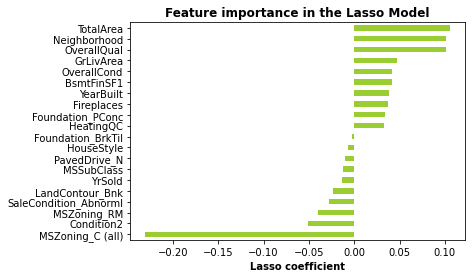

In [0]:
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [0]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  60 important features and dropped the other  53  features


In [0]:
alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]

l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]
elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)
elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)


Root Mean Square Error test = 0.16457297527220996
0.001


In [0]:
alphas = [0.001]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]
elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)


Root Mean Square Error test = 0.16457297527220996
0.001
1.0


### XGBoostRegressor with Gridsearch CV

In [0]:
#Grid search CV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
parameters = {'colsample_bytree':[0.5,0.7],
              'reg_alpha':[0.001,0.0001,0.1,0.01,10,100],
              'reg_lambda':[1,0.01,0.8,0.001,0.0001],
              'n_estimators' :[2000,3460,4000,500,1000],
              'learning_rate': [0.01,0.1], #so called `eta` value
              'max_depth': [3,5, 6, 7,9],
              'min_child_weight': [3,4,5],
              'colsample_bytree': [0.5,0.7],
              }
xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring = 'neg_mean_squared_error',
                        verbose=True)

xgb_grid.fit(x_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
#Fitting with Best parameters
boost_params = {'eval_metric': 'rmse'}
model1=XGBRegressor(colsample_bytree= 0.7, 
                    learning_rate= 0.03, 
                    max_depth= 5, 
                    min_child_weight= 4,
                    n_estimators= 500, 
                    nthread= 4,
                    objective= 'reg:linear', 
                    silent=1, 
                    subsample= 0.7,**boost_params)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
y_pred = np.expm1(y_pred)

In [0]:
#Predicting actual Test
ytest_pred=model1.predict(X_test)
ytest_pred = np.expm1(ytest_pred)
ytest_pred=pd.DataFrame(ytest_pred)

In [0]:
print(ytest_pred.shape)

(1459, 1)


In [0]:
import math

def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [0]:
rmsle(y_pred,y_test)

9.489228221002312

In [0]:
sample_data=pd.read_csv(sample_submission_data_path)
df=pd.concat([sample_data['Id'],ytest_pred],axis=1)
df.columns=['Id','SalePrice']
df.to_csv('submission.csv',index=False)
df.head()

,Id,SalePrice
0,1461,124767.437500
1,1462,163461.250000
2,1463,184574.437500
3,1464,192334.765625
4,1465,181405.156250
